# Анализ оттока клиентов банка "Метанпром".

Мы работаем с данными клиентов банка "Метанпром", который столкнулся с проблемой оттока клиентов, **цель исследования - выделить сегменты клиентов склонных к оттоку и сформулировать возможные стратегии для их удержания**.

## Содержание:
1. [**Загрузка и описание данных**](#загрузка-и-описание-данных);
2. [**Предобработка данных**](#предобработка-данных);
   - 2.1 [Исправление ошибок в форматировании](#исправление-ошибок-в-типизации-и-форматировании-данных);
   - 2.2 [Анализ и исправление пропусков](#анализ-и-исправление-пропусков);
   - 2.3 [Анализ и исправление дубликатов](#анализ-и-исправление-дубликатов);
   - 2.4 [Анализ и исправление аномалий](#анализ-и-исправление-аномалий);
   - 2.5 [Кодирование строковых столбцов для дальнейшего использования в анализе корреляции](#кодирование-строковых-столбцов-для-дальнейшего-использования-в-анализе-корреляции);
3. [**Исследовательский анализ данных (EDA)**](#исследовательский-анализ-данных);
   - 3.1 [Анализ распределения признаков (распределени для непрерывных и категориальных переменных, анализ по группам оттока)](#анализ-распределения-признаков);
   - 3.2 [Корреляционный анализ (матрица корреляций, выяснить связь признаков с показателями оттока)](#корреляционный-анализ);
4. [**Проверка гипотез**](#проверка-гипотез);
   - 4.1 [Гипотеза №1: клиенты с высоким балансом, но низким количеством банковских продуктов, имеют повышенный риск оттока по сравнению с клиентами с аналогичным балансом, но более широким набором продуктов](#гипотеза-1);
   - 4.2 [Гипотеза №2: клиенты, у которых оценочный доход значительно превышает  баланс на счёте, склонны к оттоку чаще, чем клиенты с сопоставимыми доходом и балансом](#гипотеза-2);
5. [**Промежуточные выводы**](#промежуточные-выводы);
   - 5.1 [Вывод по анализу распределений](#вывод-по-распределению-признаков);
   - 5.2 [Вывод по результатам корреляционного анализа](#вывод-по-корреляционному-анализу);
   - 5.3 [Вывод по проверке гипотез](#вывод-по-проверке-гипотез);
   - 5.4 [Вывод по исследовательскому анализу](#вывод-по-результатам-исследовательского-анализа);
   - 5.5 [Выделяем признаки влияющие на отток](#выделяем-признаки-влияющие-на-отток);
6. [**Сегментация клиентов**](#сегментация-клиентов) (цель - выделить однородные группы где отток выше среднего по банку, 500+ клиентов на один сегмент);
7. [**Приоритизация сегментов**](#приоритизация-сегментов) (цель - определить сегменты с которыми стоит работать в первую очередь);
8. [**Рекомендации**](#рекомендации-по-работе-с-приоритетными-сегментами) по работе с приоритетными сегментами клиентов.

## Загрузка и описание данных

Импортируем необходимые бибилиотеки, загружаем данные и сохраняем в переменной `data`, выводим общую информацию о данных в таблице.

In [1]:
# для работы с таблицей
import pandas as pd         
import numpy as np

# для вывода визуализаций
import matplotlib.pyplot as plt   
import seaborn as sns

# для работыс моделями машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# для проверки статестических гипотез
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# сохраняем данные в переменной data
data = pd.read_csv('_dataset_')

In [3]:
# выводим общую информацию о таблице
print('ОБЩАЯ ИНФОРМАЦИЯ О ТАБЛИЦЕ:')
print('-'*26)
display(data.info())

# выводим первые 5 строк таблицы
print('\nПЕРВЫЕ ПЯТЬ СТРОК ТАБЛИЦЫ:')
print('-'*28)
display(data.head())

# выводим описание числовых столбцов
print('\nЧИСЛОВЫЕ СТОЛБЦЫ ТАБЛИЦЫ:')
print('-'*25)
display(data.describe())

ОБЩАЯ ИНФОРМАЦИЯ О ТАБЛИЦЕ:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None


ПЕРВЫЕ ПЯТЬ СТРОК ТАБЛИЦЫ:
----------------------------


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1



ЧИСЛОВЫЕ СТОЛБЦЫ ТАБЛИЦЫ:
-------------------------


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


**ОПИСАНИЕ ДАННЫХ:**

`USERID` — идентификатор пользователя,    
`score` — баллы кредитного скоринга,  
`city` — город,  
`gender` — пол,  
`age` — возраст,  
`equity` — количество баллов собственности,  
`balance` — баланс на счёте,  
`products` — количество продуктов банка, которыми пользуется клиент,  
`credit_card` — есть ли кредитная карта (`0` - нет, `1` - да),  
`last_activity` — активный клиент (`0` - нет, `1` - да),  
`EST_SALARY` — оценочный доход клиента,  
`сhurn` — признак оттока (`0` - не в оттоке, `1` - в оттоке).

**ЧИСЛОВЫЕ СТОЛБЦЫ ТАБЛИЦЫ:**

- `Признак оттока` - 18.2% клиентов у нас ушли (churn = 1), это говорит нам о наличии дисбаланса классов;
- `Возраст` - в данных клиенты от 18 до 86 лет, в среднем клиентам банка 42 года;
- `СВобственность` - в среднем у клиентов около 2 единиц собственности, также стоит заметить что у 25% нет собственности;
- `Продукты банка` - видим первые аномалии, а именно 0 продуктов, клиенты с 0 продуктов не попадут в нашу выборку, в среднем у клиентов банка около 2х продуктов;
- `Кредитные карты` - согласно показателям пользователи не берут больше одной кредитной карты;
- `Баллы кредитного скорринга` - видим также что у пользователей достаточно высокие баллы, в среднем около 850 из максимальных 1000. 

## Предобработка данных

В рамках предобработки нам предстоит подготовить данные к дальнейшему анализу. Исправим ошибки, поработаем с пропусками, дубликатами. 

### Исправление ошибок в форматировании

Приведем названия всех столбцов к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Теперь названия столбцов написаны в нижнем регистре, это нужно для комфортной работы со столбцыми датафрейма, что бы избежать ошибок в следующих частях исследования.

### Анализ и исправление пропусков

Перед основной обработкой пропусков, мы выясним природу пропусков (тип пропусков согласно классификации) и их зависимость от имеющихся данных. Это поможет нам выбрать более удачную стратегию по работе с ними. 

In [5]:
print(data.isna().sum())
print('\nПроцент пропущенных значений от общего числа')
print((data.isna().sum() / len(data)).round(4) * 100)
print()
print(f' Количество строк в DataFrame = {len(data)}')

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Процент пропущенных значений от общего числа
userid            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

 Количество строк в DataFrame = 10000


Видим, что пропуски найдены только в двух столбцах нашей таблицы (`age`,`balance`). Проведем анализ и выясним к какому типу пропусков они относятся.

**Классификация пропусков:**

- `MCAR` (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;
- `MAR` (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;
- `MNAR` (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

Для этого нам понадобиться проанализировать зависимости пропусков от других признаков.

In [6]:
# выделим индексы столбцов с пропусками
missing_info = data.isnull().sum()
cols_with_missing = missing_info[missing_info > 0].index.tolist()

# cловарь для хранения результатов анализа
missing_analysis = {}

# выделим числовые и категориальные признаки
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()

for col in cols_with_missing:
    # создаём индикатор пропуска
    missing_flag = f"{col}_is_missing"
    data[missing_flag] = data[col].isnull().astype(int)
    
    # анализ зависимости пропусков от других признаков
    correlations = {}
    group_stats = {}
    
    # корреляция с числовыми признаками
    # также добавляем сортировку что бы вывести топы признаков
    if numeric_cols:
        corr_with_numeric = data[
            numeric_cols + [missing_flag]
            ].corr()[missing_flag].drop(missing_flag)
        correlations['numeric'] = corr_with_numeric.abs().sort_values(ascending=False)
    
    # сравнение распределений:
    for other_col in numeric_cols:
        if other_col == col:
            continue
        # медиана и среднее по группам
        stats = data.groupby(missing_flag)[other_col].agg(['mean', 'median', 'count'])
        group_stats[other_col] = stats
    
    missing_analysis[col] = {
        'correlations': correlations,
        'group_stats': group_stats
    }

    # вывод
    print(f"\nАнализ пропусков в {col}")
    if 'numeric' in correlations:
        top_corr = correlations['numeric'].head(3)
        print("Топ-3 признака по модулю корреляции с пропуском:")
        print(top_corr)
    
    # сравнение медиан для одного из числовых признаков
    if numeric_cols and col != numeric_cols[0]:
        example_col = [c for c in numeric_cols if c != col][0]
        stats = group_stats[example_col]
        print(f"\nСравнение '{example_col}' по наличию пропуска в '{col}':")
        print(stats)


Анализ пропусков в age
Топ-3 признака по модулю корреляции с пропуском:
userid      0.034571
products    0.033751
equity      0.032040
Name: age_is_missing, dtype: float64

Сравнение 'userid' по наличию пропуска в 'age':
                         mean    median  count
age_is_missing                                
0               171755.218669  172643.0   9974
1               194637.500000  208447.0     26

Анализ пропусков в balance
Топ-3 признака по модулю корреляции с пропуском:
equity        0.709951
products      0.487512
est_salary    0.307154
Name: balance_is_missing, dtype: float64

Сравнение 'userid' по наличию пропуска в 'balance':
                             mean    median  count
balance_is_missing                                
0                   171738.837508  172740.0   7705
1                   172069.447930  172659.0   2295


Мы провели анализ пропусков и их зависимостей, по итогам можно сделать следующие выводы:

**Пропуски в `age`:**
- Корреляции с другими признаками очень слабые (максимум 0.035).
- Сравнение userid показывает небольшое различие в среднем, но выборка с пропусками крайне мала (всего 26 наблюдений из 10 000).

*Вывод:* пропуски в `age`, скорее всего, `MCAR`.
Следовательно, можно заполнять медианой (или средним, но медиана будет более устойчива к выбросам).

**Пропуски в `balance`:**
- Очень сильная корреляция с equity (0.71), умеренная с products (0.49) и est_salary (0.31).
Это говорит о том, что пропуски в balance зависят от других признаков.
- Простое заполнение медианой исказит связи между balance, equity и другими признаками.

*Вывод:* пропуски в `balance`, вероятно `MNAR`. Поэтому заполнять их одни значением (средним или медианной) будет неправильно. Заполним пропуски в этом столбце с помощью линейной регрессии.

In [7]:
# заполняем пропуски в `age`
data['age'].fillna(data['age'].median(), inplace=True)

# data.isna().sum()

C:\Users\0_0\AppData\Local\Temp\ipykernel_20548\2173082854.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


Мы заполнили пропуски в столбце `age` медианным значением по этому столбцу, теперь перйдем к построению модели линейной регрессии для заполнения пропусков в столбце `balance`.

In [8]:
# в качестве признаков будем использовать показатели столбцов
# с которыми была большая корреляция у нашей целевой перемнной

# скопируем датафрейм
df = data.copy()

# признаки
features = ['equity', 'products', 'est_salary', 'age']

# целевая переменная
y_train = df[df['balance'].notnull()]
y_predict = df[df['balance'].isnull()]

# стандартизируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(y_train[features])
X_pred_scaled = scaler.transform(y_predict[features])

# создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train['balance'])

# предсказания для пропущенных значений
predictions = model.predict(X_pred_scaled)

# заполняем пропуски
df.loc[df['balance'].isnull(), 'balance'] = predictions

# df.isna().sum()

Данные заполнены, однако стоит также оценить нашу модель на качество.

In [9]:
# aункция для оценки качества восстановления пропусков в 'balance'
def evaluate_balance_imputation(original_df, imputed_df, features):
    """
    gроверяет качество заполнения пропусков в 'balance' после заполнения линейной регрессией.
    Выводит метрики(r^2,mae,rmse) и сравнение корреляций.
    """
    # наблюдения без пропусков для обучения и теста
    train_df = original_df[original_df['balance'].notnull()].copy()

    # оценка модели
    X = train_df[features]
    y = train_df['balance']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # стандартизация признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # обучаем модель и строим предсказания
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # рассчитываем метрики оценки
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # выводим
    print("Оценка точности модели линейной регрессии для 'balance':")
    print(f"R^2 = {r2:.3f}")
    print(f"MAE = {mae:.2f}")
    print(f"RMSE = {rmse:.2f}\n")

    # проврим показатели корреляций и сравним их до заполнения и после
    before_corr = original_df[['balance'] + features].corr()['balance']
    after_corr = imputed_df[['balance'] + features].corr()['balance']

    print("Корреляции с balance (до и после заполнения):\n")
    corr_compare = pd.DataFrame({'До заполнения': before_corr, 'После заполнения': after_corr})
    print(corr_compare)

# применяем нашу функцию добавляя наши данные и признакми
evaluate_balance_imputation(
    original_df=data, 
    imputed_df=df, 
    features=['equity', 'products', 'est_salary', 'age']
    )

Оценка точности модели линейной регрессии для 'balance':
R^2 = 0.445
MAE = 468125.86
RMSE = 955337.36

Корреляции с balance (до и после заполнения):

            До заполнения  После заполнения
balance          1.000000          1.000000
equity           0.164126          0.108567
products         0.075684          0.065431
est_salary       0.339622          0.435266
age              0.069621          0.081177


Для проверки работы нашей модели мы использовали метрики `R²`(коэффициент детерминации), `MAE`(среднее абсолютное отклонение прогноза от фактического показателя), `RMSE`(средняя величина ошибок), а также сравнили показатели корреляции до заполнения пропусков с показателями после заполнения.

Согласно полученным показателям можно сказать следующее:

Модель линейной регрессии уловила общую зависимость, но точность умеренная. Это типично, если зависимость balance от других признаков нелинейная или сильно искажена выбросами.
Для задач восстановления пропусков (а не прогноза) это допустимо, ведь цель не в точных значениях, а в сохранении общих закономерностей.

Все зависимости сохранились по направлению и смыслу, а усиление связи с est_salary — естественный эффект модели, а не ошибка.
Главное, что знаки корреляций не изменились и величины остались близкими.

Заполнение пропусков в balance с помощью линейной регрессии можно считать качественным и безопасным.
Модель достаточно точна, чтобы восстановить пропуски без искажения закономерностей между признаками.
Тенденции между balance и ключевыми переменными (equity, est_salary, products, age) сохранились.

### Анализ и исправление дубликатов

Рассмотрим явные и неявные дубликаты в нашем датафрейме.

In [10]:
# явные дубликаты
print(f'Количество явных дубликатов = {df.duplicated().sum()}')

Количество явных дубликатов = 0


In [11]:
# неявные дубликаты
print(f'Количество совпадений по userid = {len(
    df[df.duplicated(
        subset=['userid'],
        keep=False)]
    )}')

Количество совпадений по userid = 146


Видим что явных дубликатов в нашей таблице нет, а вот по `userid` целых 146 совпадений.

По сути это всего 73 дубликата из 10000 строк (0.73%), их удаление не окажет сильного влияния на статистические показатели, поэтому просто избавимся от них.

In [12]:
df.drop_duplicates(subset=['userid'], inplace=True)

df.duplicated(subset=['userid']).sum()

np.int64(0)

### Анализ и исправление аномалий

Изучим столбец, `products`. Клиенты с показателем 0 должны быть удаленны, так как они не относятся к клиентами банка.

In [13]:
print(len(df[df['products']==0]))
print(df[df['products']==0].index)

1
Index([8957], dtype='int64')


Нам повезло, удалим это наблюдение

In [14]:
df.drop([8957],inplace=True)

len(df[df['products']==0])

0

### Кодирование строковых столбцов для дальнейшего использования в анализе корреляции

Это необходимый шаг, так как в дальнейшем нам прийдется проводить корреляционный анализ и строить модели машинного обучения на основе данных всех столбцов, поэтому стоит привести наши столбцы типа `object` к необходимому нам типу.

In [15]:
# кодируем нашу таблицу
df_coded = pd.get_dummies(df, columns=['city', 'gender'], drop_first=False)

df_coded.head()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_is_missing,balance_is_missing,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,25.0,1,5.921482e+04,2,0,1,75719.14,1,0,0,False,True,False,True,False
1,146556,861.0,37.0,5,8.505943e+05,3,1,0,86621.77,0,0,0,False,True,False,True,False
2,120722,892.0,30.0,0,-1.117989e+05,1,1,1,107683.34,0,0,1,False,True,False,True,False
3,225363,866.0,51.0,5,1.524746e+06,2,0,1,174423.53,1,0,0,False,False,True,True,False
4,157978,730.0,34.0,5,1.740000e+02,1,1,0,67353.16,1,0,0,False,False,True,False,True


**ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:**

В рамках предобработки мы подготавливали данные к дальнейшему исследовательскому анализу, корреляционному анализу, анализу оттока и сегментации клиентов банка, сделано было следующее:

- 1. Названия столбцов были приведены к нижнему регистру для комфортной работы и избежания возможных ошибок;
- 2. Выяснили природу пропусков в данных. Пропуски в столбце `age` - случайны (MCAR), поэтому пропуски были заменены медианным значением возраста. Пропуски в столбце не являлись случайными и были зависимы от других показателей, поэтому были заполнены с помощью линейной регрессии;
- 3. Дубликаты были удалены, поскольку их количество не влияет на тенденции или закономрности в данных;
- 4. Пользователи с числом продуктов = 0, были удалены;
- 5. Категориальные признаки типа `object` были кодированы, каждый категориальный признак получил булевый тип.

## Исследовательский анализ данных

В рамках исследовательского анализа мы рассмотрим распределение признаков и проведем корреляционный анализ.

### Анализ распределения признаков

- **непрервные признаки:** их мы анализируем, чтобы найти интервалы признака, на которых отток выше, чем лояльность;

- **категориальные/дискретные признаки:** их мы анализируем, чтобы понять, какое из значений категориального признака более или менее склонно к оттоку.

Рассмотрим респределения наших признаков с разбивкой по группе оттока.

In [16]:
# функция для построяния графиков распределения признаков
def distr_hist(df, features, n_cols):
    ''' Функция датафрейм, столбцы по каоторым строит распределение
        и количество столбцов для построения графиков на одном слайде.
        
        строит сабплотс столбчатые графики распределений'''


    n_features = len(features) # считаем количество признаков
    n_rows = (n_features + n_cols - 1) // n_cols # создаем количество строк для графиков

    # строим сабплотс графики
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))

    if n_features == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    # строим гистограммы
    for i, col in enumerate(features):
        sns.histplot(
            data=df,
            x=col,
            hue='churn',
            bins=30,
            kde=False,
            alpha=0.5,
            palette={0: 'skyblue', 1: 'salmon'},
            ax=axes[i]
        )
        axes[i].set_title(f'{col} по группе оттока')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')
        axes[i].legend(
            title='Группа оттока',
            labels=['Ушли', 'Не ушли']
        )

    # скрываем лишние сабплоты
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

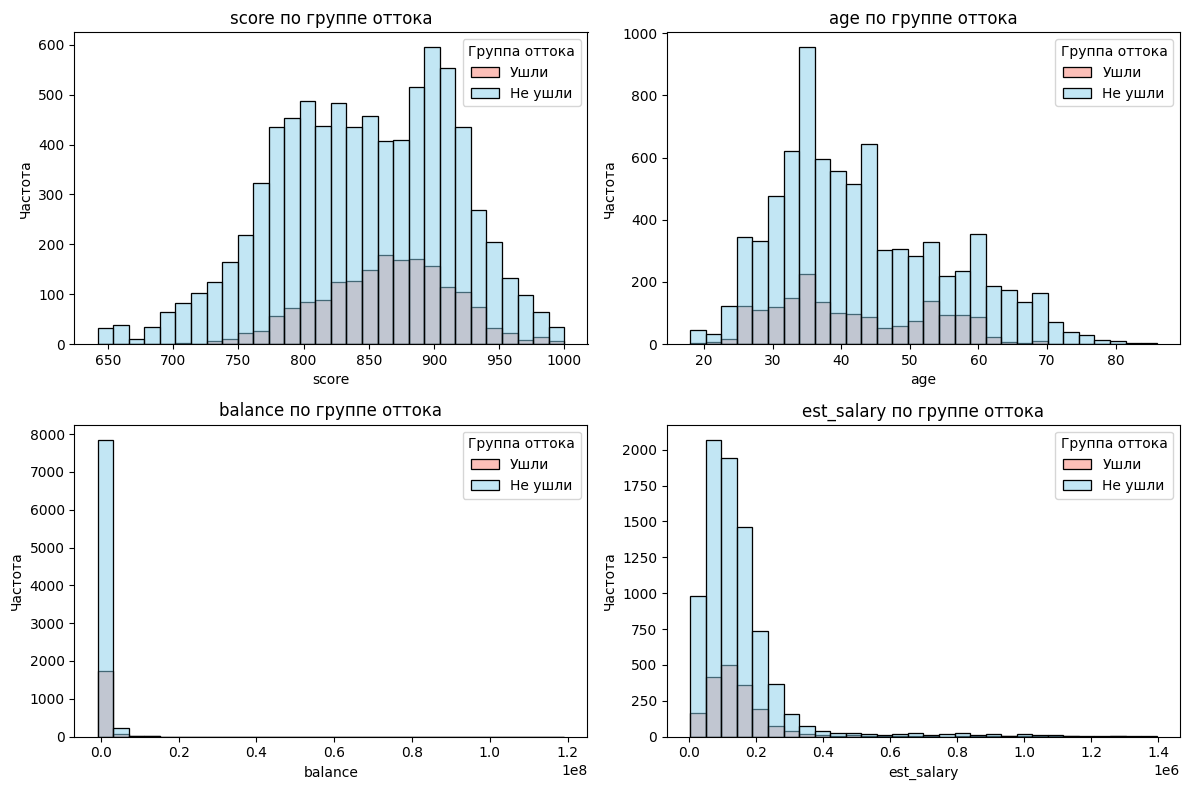

In [17]:
# выделяем наши непрерывные признаки и вызываем функцию для визуализации
const = ['score','age','balance','est_salary']
distr_hist(df_coded, const, 2)

Рассмотрим распределения `balance` и `est_salary` подробнее. 

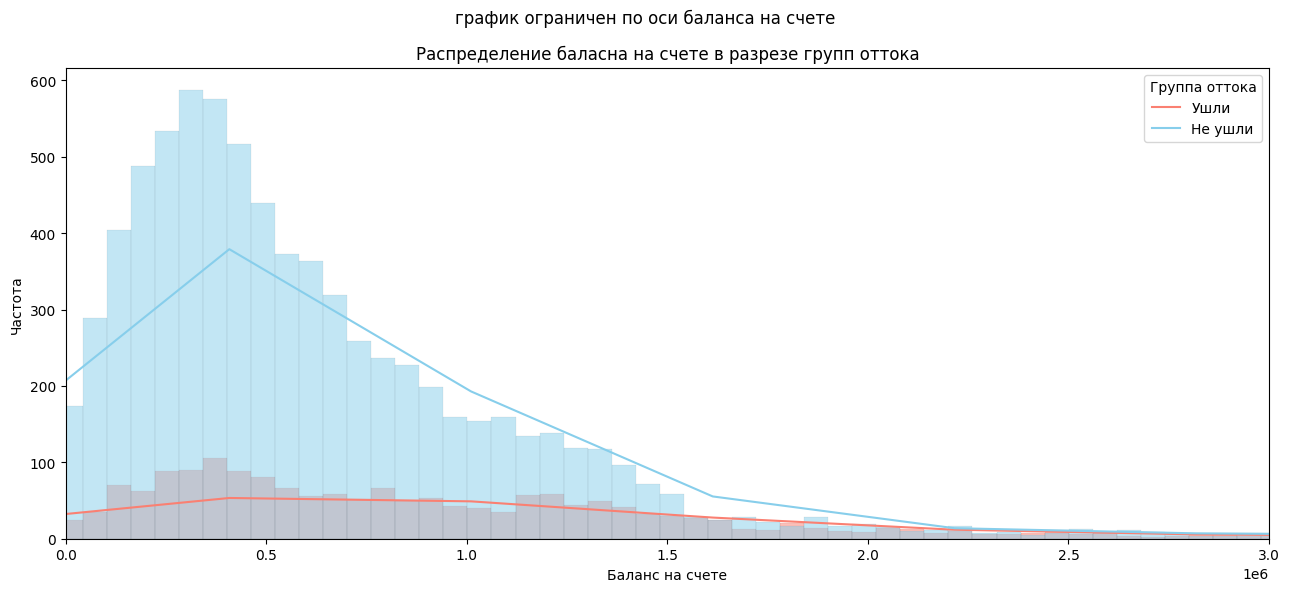

In [18]:
# гистограмма для balance
plt.figure(figsize=(13,6))
sns.histplot(
    df_coded,
    x='balance',
    hue='churn',
    bins=2000,
    kde=True,
    palette={0: 'skyblue', 1: 'salmon'}    
)
plt.xlim(0, 3e6)
plt.title('Распределение баласна на счете в разрезе групп оттока')
plt.suptitle("график ограничен по оси баланса на счете")
plt.xlabel('Баланс на счете')
plt.ylabel('Частота')
plt.legend(
    title='Группа оттока',
    labels=['Ушли', 'Не ушли']
)
plt.tight_layout()
plt.show()

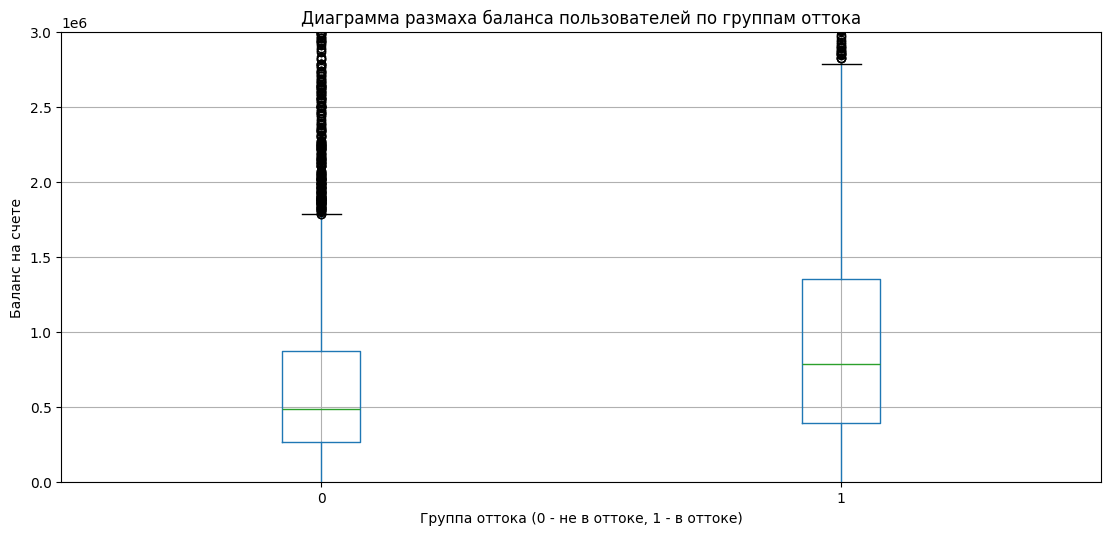

In [19]:
# построим также диаграмму размаха что бы опредлить границу выбросов и увидеть медианные значения
df_coded.boxplot(column='balance', by='churn', figsize=(13,6))

plt.title('Диаграмма размаха баланса пользователей по группам оттока')
plt.suptitle('')
plt.xlabel('Группа оттока (0 - не в оттоке, 1 - в оттоке)')
plt.ylabel('Баланс на счете')
plt.ylim(0, 3e6)
plt.show()

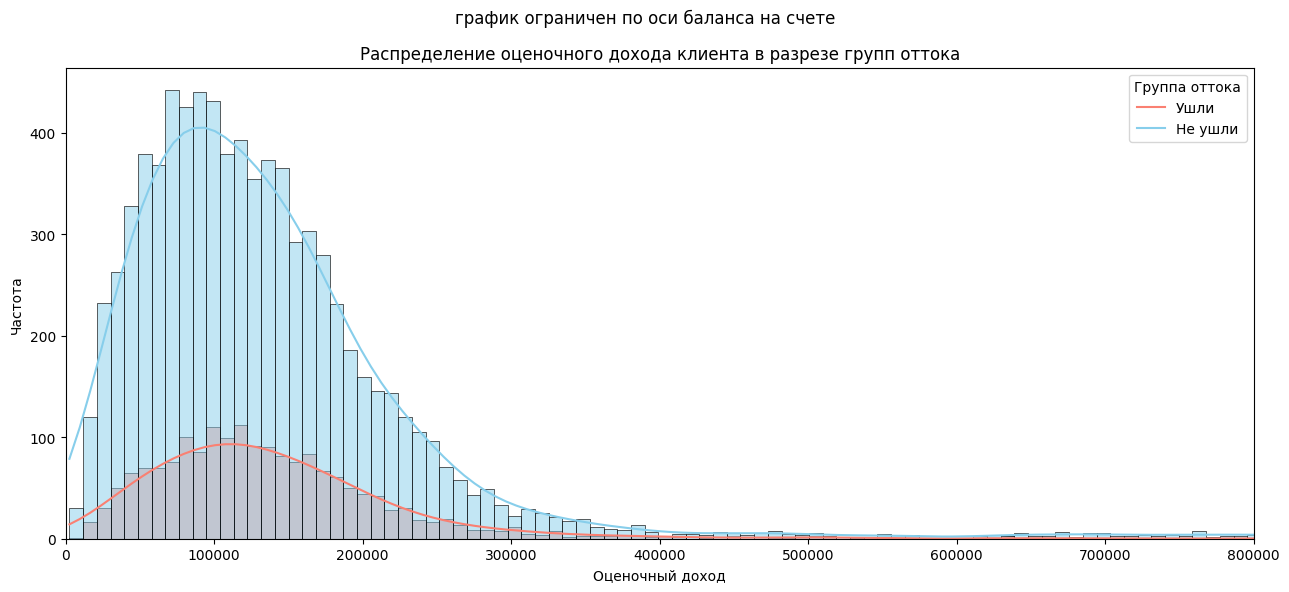

In [20]:
# гистограмма для est_salary
plt.figure(figsize=(13,6))
sns.histplot(
    df_coded,
    x='est_salary',
    hue='churn',
    kde=True,
    palette={0: 'skyblue', 1: 'salmon'}    
)
plt.xlim(0, 0.8e6)
plt.title('Распределение оценочного дохода клиента в разрезе групп оттока')
plt.suptitle("график ограничен по оси баланса на счете")

plt.xlabel('Оценочный доход')
plt.ylabel('Частота')
plt.legend(
    title='Группа оттока',
    labels=['Ушли', 'Не ушли']
)
plt.tight_layout()
plt.show()

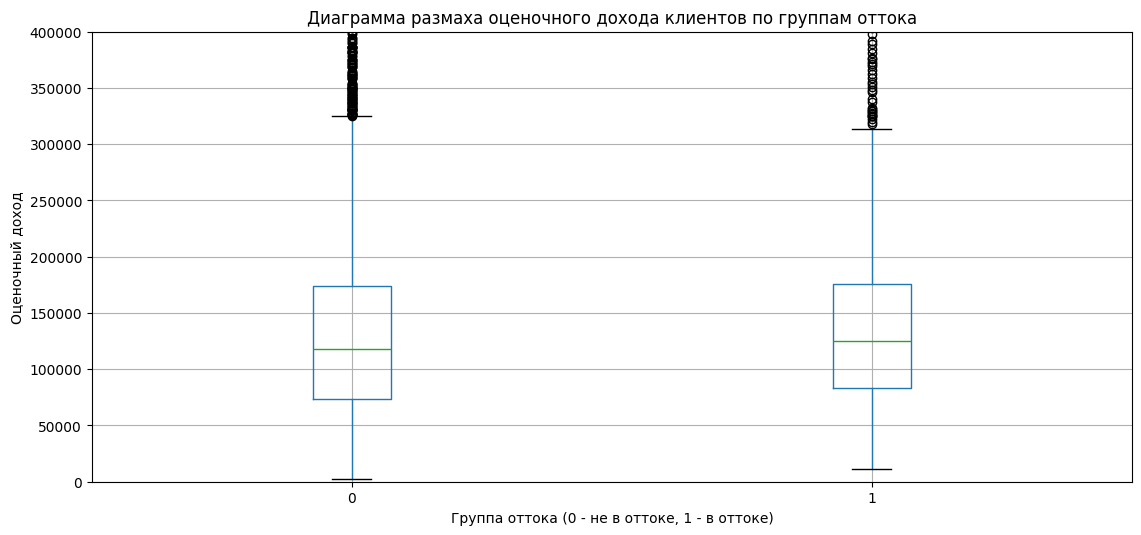

In [21]:
df_coded.boxplot(column='est_salary', by='churn', figsize=(13,6))

plt.title('Диаграмма размаха оценочного дохода клиентов по группам оттока')
plt.suptitle('')
plt.xlabel('Группа оттока (0 - не в оттоке, 1 - в оттоке)')
plt.ylabel('Оценочный доход')
plt.ylim(0, 0.4e6)
plt.show()

**ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ ПО РАСПРЕДЕЛЕНИЮ НЕПРЕРЫВНЫХ ПРИЗНАКОВ:**

1. В первую очередь, стоит сказать о сильной ***ассиметрии распределений***, большинство из них (balance, est_salary) имеют длинные правые хвосты (выбросы), в то время как основные показатели находятся на низких значениях

2. Также, мы видим что ***возрастные группы с оттоком*** смещены в сторону более молодых клиентов (пик в районе 20–35 лет), тогда как "стабильные" клиенты чаще находятся в возрасте 30–50 лет.

3. По ***кредитному скорингу (score)*** ушедшие клиенты концентрируются в средних диапазонах (750–900), что может означать, что экстремальные значения скоринга (очень высокие или низкие) ассоциируются с меньшей вероятностью оттока.

Теперь рассмотрим распредления категориальных/дискретных признаков.

In [22]:
# построим функцию для визуализации столбчатых диаграм по категориальных признакам
def distr_bar(df, features, n_col):

    '''Функция получает данные, признаки и количество столбцов для сабплотс графиков'''

    n_features = len(features)
    n_rows = (n_features + n_col - 1)//n_col

    fig, axes = plt.subplots(n_rows, n_col, figsize=(6*n_col, 4*n_rows))
    if n_features == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # строим столбчатые диаграммы
    for i, col in enumerate(features):
        sns.barplot(
            data=df,
            x=col,
            y='churn',
            ax=axes[i]
        )
        axes[i].set_title(f'{col} по группе оттока')
        axes[i].set_xlabel(col)
        axes[i].axhline(y =df['churn'].mean(), color='red', linestyle='--')
    
    # скрываем лишние сабплот
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

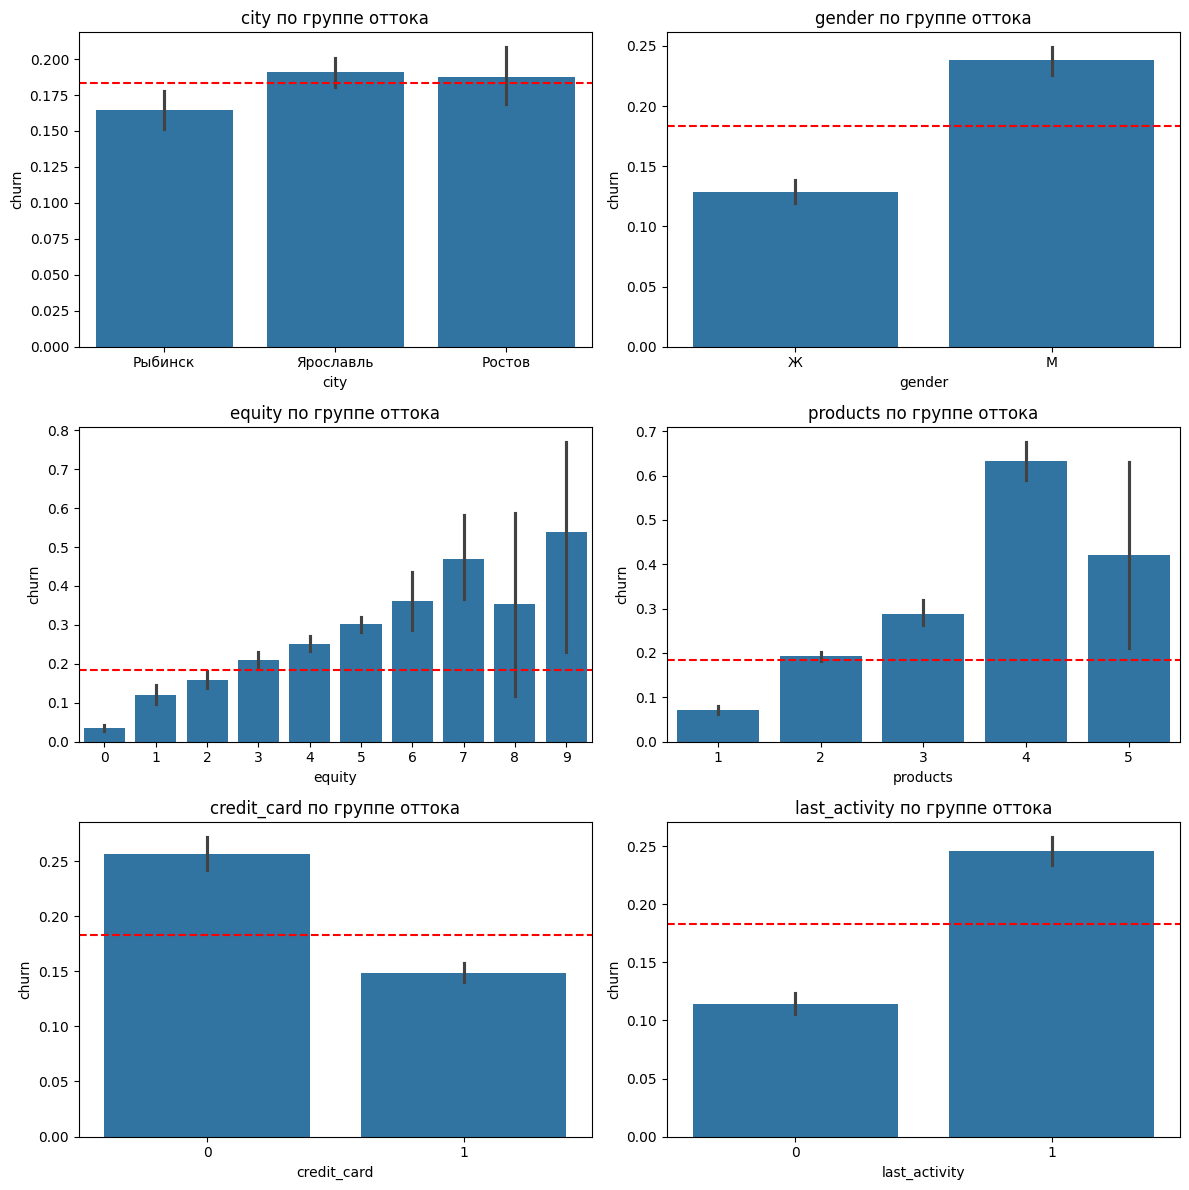

In [23]:
categ = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']
distr_bar(df, categ, 2)

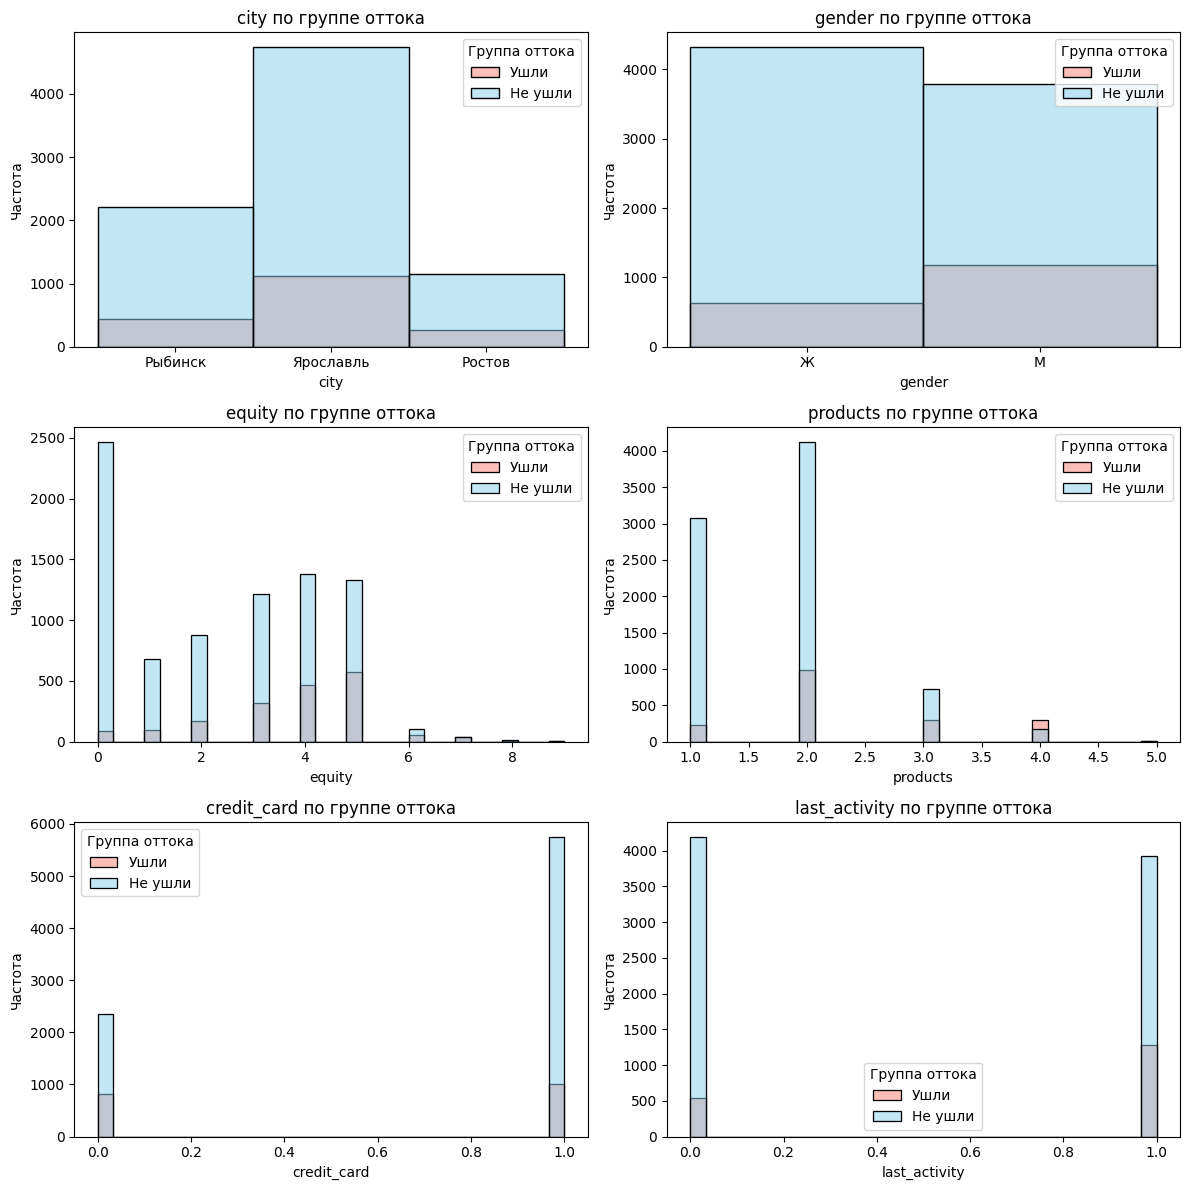

In [24]:
distr_hist(df, categ, 2)

Мы рассмотрели гистограммы распределений дискретных признаков с добавлением группы ушедших пользователей и диаграммы с указанием доверительного интервала, и среднего показателя оттока, однако для визуализации четких различий по доле ушедших пользователей стоит рассмотреть точечный график с указанием доверительного интервала. 

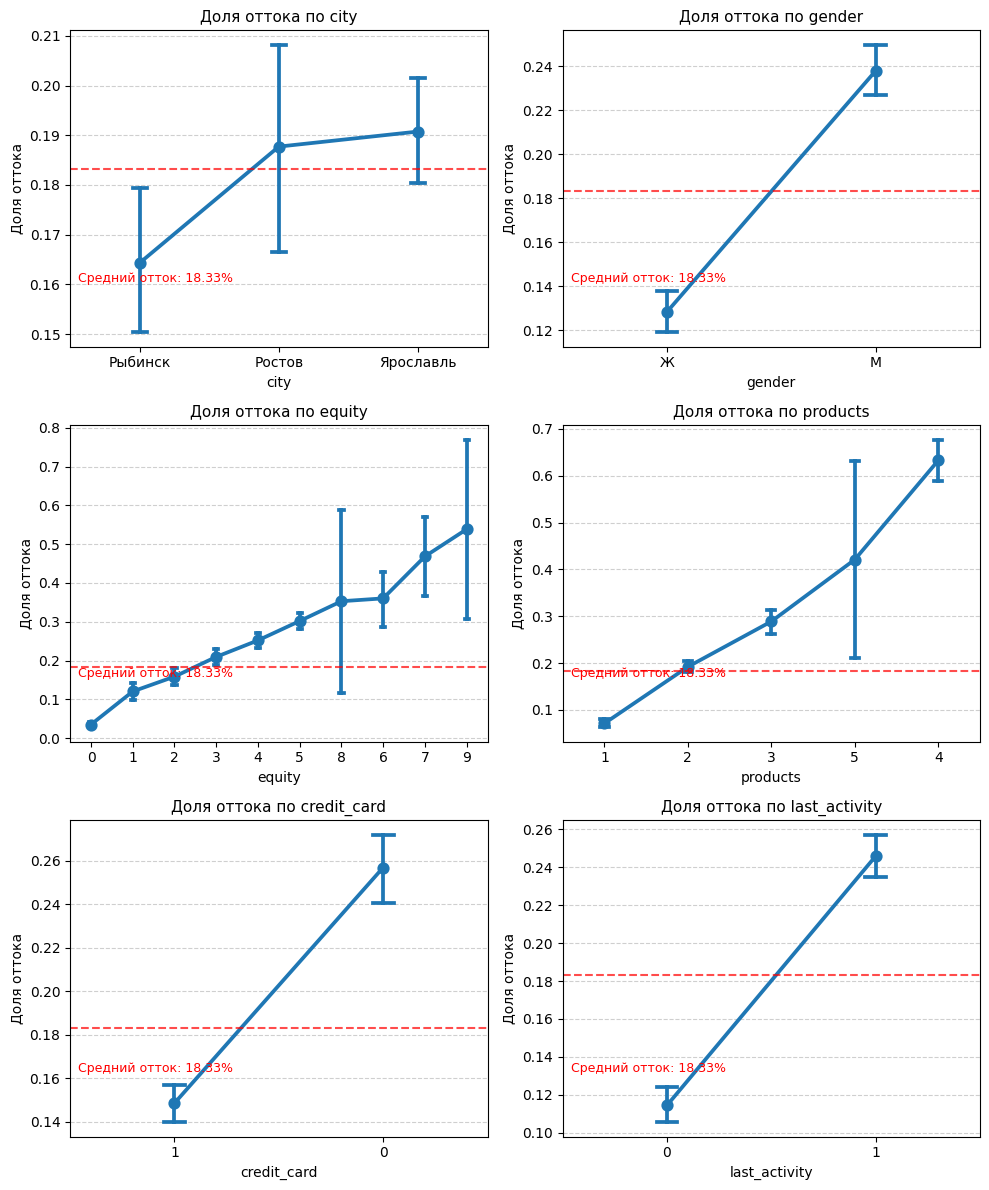

In [25]:
def plot_pointplots_with_ci(df, cat_columns, num_cols=2):

    '''
    Функция получает данные, признаки и количество колонок
    для построения сабплотс графиков
      
    строит сабплотс диаграммы с указанием доверительного интервала  '''
    
    n = len(cat_columns)
    num_rows = (n + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    
    if n == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if num_rows > 1 else axes

    for i, col in enumerate(cat_columns):
        ax = axes[i]
        
        # сортировка категорий по средней доле оттока
        order = df.groupby(col)['churn'].mean().sort_values().index
        
        # построение точечного графика с указанием доверительного интервала
        sns.pointplot(
            x=col,
            y='churn',
            data=df,
            order=order,
            ax=ax,
            errorbar=('ci', 95),
            capsize=0.1,
            color='#1f77b4',
            markers='o'
        )
        
        ax.set_title(f'Доля оттока по {col}', fontsize=11)
        ax.set_ylabel('Доля оттока', fontsize=10)
        ax.set_xlabel(col, fontsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        
        # добавляем среднюю линию оттока
        avg_churn = df['churn'].mean()
        ax.axhline(avg_churn, color='r', linestyle='--', linewidth=1.5, alpha=0.7)
        ax.text(0.02, avg_churn + 0.02, f'Средний отток: {avg_churn:.2%}', 
                transform=ax.transAxes, fontsize=9, color='r')

    # скрываем пустые сабплоты
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_pointplots_with_ci(df,categ, 2)

Стоит сделать пояснения к данным графикам.

Эти графики демонстрируют нам долю оттока клиентов для каждой категории дискретных признаков.
1. `Ось X` - категории признака (то есть наши дискретные признаки);
2. `Ось Y` - доля оттока от 0 до 1;
3. `Синяя линия соединяющая точки` - это средняя доля оттока для каждой категории(точки в данном случае это и есть среднее);
4. `Вертикальные синии линии` - доверительный интервал (степень неопределенности оценки доли оттока, чем уже интервал - тем выше надежность оценки);
5. `Красная пунктирная линия` - это показатель средний отток по всему датафрейму;


Нам важно обратить внимание на:
 - Положение точек относительно красной линии - категории с средней долей оттока выше этой линии имеют отток выше среднего (это указывает нам на "стабильные" и "рисковые" сегменты)
 - Ширина интервалов - чем шире интервал тем ненадежнее показатель среднего
 - Пересечение интервалов с красной линией - если интервал пересекает среднюю линию, разница в оттоке может быть случайной

 Теперь можно перейти к промежуточным выводам.

**ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ ПО РАСПРЕДЕЛЕНИЮ ДИСКРЕТНЫХ ПРИЗНАКОВ:**

1. Согласно построенным графикам, **в Рыбински самый низкий средний показатель оттока пользователей** (по количеству клиентов занимает 2 место), при этом самый стабильный доверительный интервал, что может говорить нам об уровне статистической значимости. В остальных городах значительно большой средний процент оттока ползователей, но показатель нельзя назвать статистически значимым, поэтому есть высокая вероятность того что средний показатели оттока с низкой погрешностью совпадают со средним показателем оттока по всему набору данных (18.33%);

2. Средний отток пользователей среди мужчин выше среднего показателя по всему набору данных и среднего показателя оттока среди женщин. Также стоит заметить, что женщин среди клиентов банка больше. **То есть именно мужчины становятся частью "группы риска" (если касаться именно оттока пользователей)**;

3. По количеству единиц сосбтвенности, **высокой долей оттока отличились клиенты с числом собственности больше 3 единиц** (включая 3). Стоит отметить, что пользователи с количеством собственности больше 5 можно отнести к группе "выбросов" (по грубой оценке), таких пользователей очень мало и они скорее редкость среди клиентов банка, а вот **клиенты с показателями 3 - 5 это достаточно большая группа клиентов, стоит разобраться в причинах оттока такой большой группы**.

4. По количеству продуктов банка, процент оттока клиентов с числом продуктов выше 2 выше среднего по набору, а у клиентов с количеством проудктов *равным 4 отток превышает долю оставшихся клиентов*. **Клиенты с числом проудуктов больше 2х явно находятся в "группе риска".**

5. **Клиенты с кредитными картами уходят значительно реже других** клиентов, это может быть связанно с выгодными условиями кредитования, которые влияют на взаимодействие банка с клиентом (то есть влияют на доверие клиента, его лояльность и удерживают в "составе" клиентов банка).

6. НЕОЧЕВИДНО, НО процент оттока среди "активных" клентов намного выше чем cреди "неактивных" (в рамках показателя `last_activity`)


### Корреляционный анализ

На предыдущем шаге, благодаря распределениям, мы смогли примерно определить возможные зависимости в данных, однако этого недостаточно, что бы четко определить возможные причины оттока клиентов, нам необходимо провести корреляционный анализ данных.

Мы выяснили, что в наших данных присудствуют выбросы и ассиметрия, поэтому базовую корреляцию Пирсона мы использовать не можем (выбросы сильно повлияют на результаты). Связи будем оценивать с помощью менее чувствительного метода - корреляция Спирмена.

Мы используем корреляция Спирмена поскольку она более устойчива к выбросам, подходит для анализа нелинейных связей (то есть там где изменение одного признака не гарантирует пропорциональное изменение другого) и работает с любимыми типами данных.

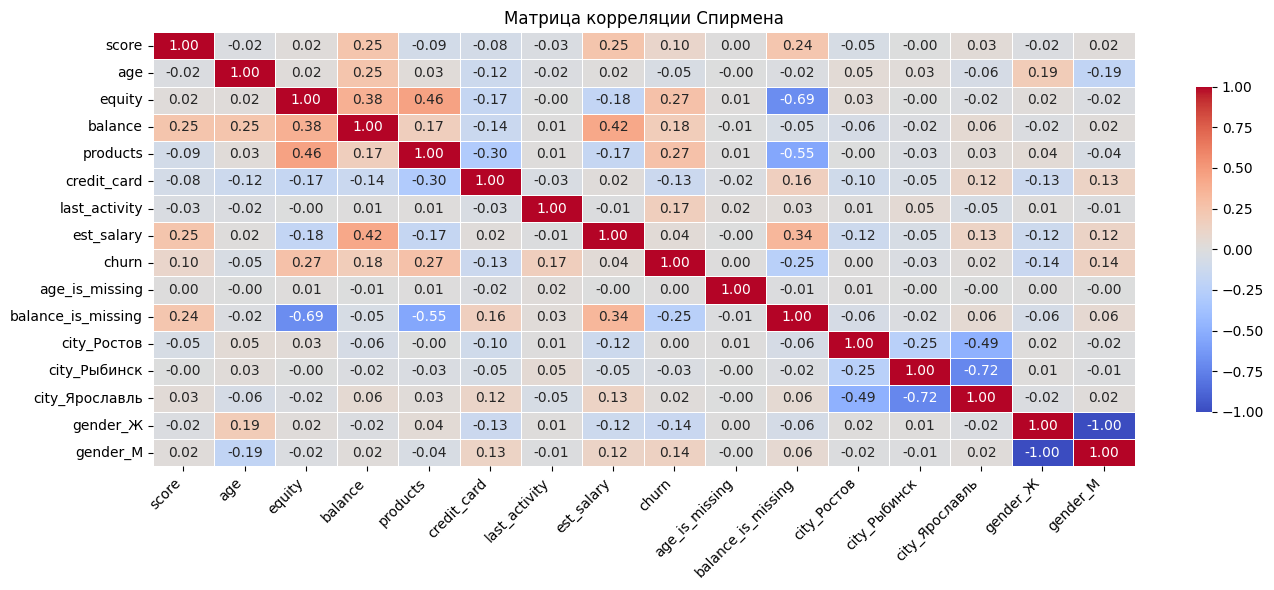

In [26]:
df_for_corr = df_coded.drop(columns=['userid'], errors='ignore')

# рассчитываем корреляцию методом Спирмена
spearman_corr_df = df_for_corr.corr(method='spearman')
# spearman_corr_df.head()

# строим хитмэп для визуализации нашего вывода
plt.figure(figsize=(14, 6))
sns.heatmap(
    spearman_corr_df,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink":0.75}
)
plt.title('Матрица корреляции Спирмена')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt. show()

Согласно графику большая часть признаков не имет ярковыраженной всязи с другими, но мы видим яркие очаги положительной и отрицательной корреляции. Рассмотрим связь признаков с показателем оттока, что бы оценить их влияние на отток клиентов банка и оценим показатели по шкале Чеддока.

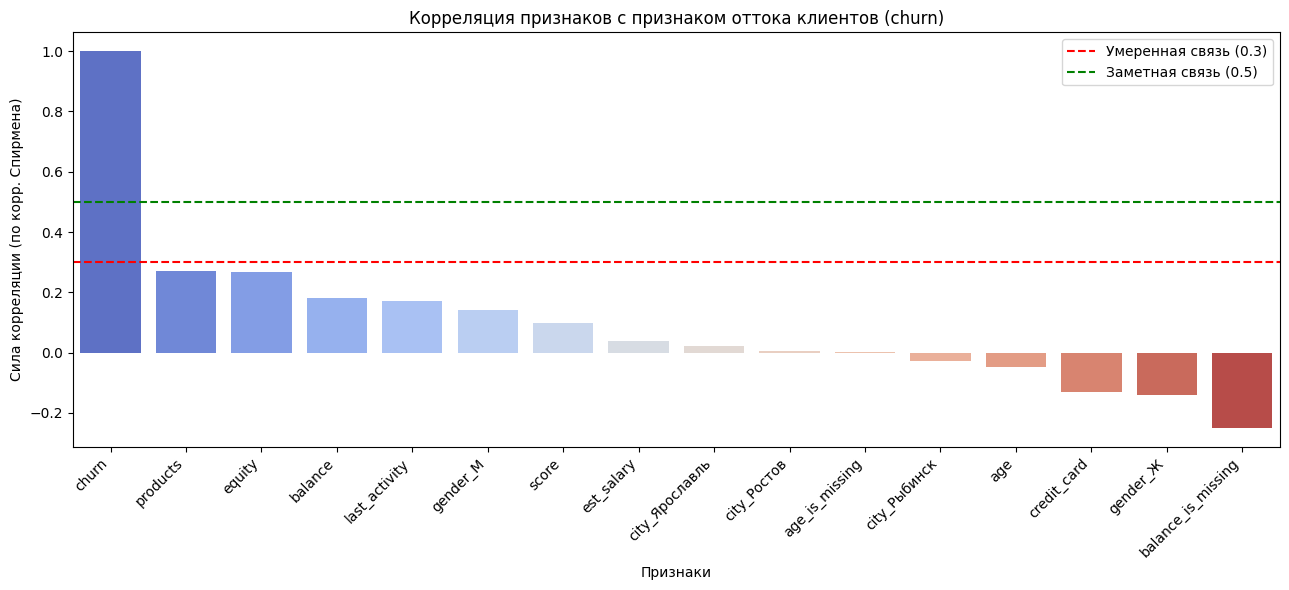

In [27]:
# выделяем влияние на churn
churn_corr = spearman_corr_df['churn'].sort_values(ascending=False)

# строим график барплот
plt.figure(figsize=(13, 6))
sns.barplot(
    x=churn_corr.index,
    y=churn_corr.values,
    palette='coolwarm',
    hue=churn_corr.index,
    dodge=False
)
plt.axhline(y=0.3, color='r', linestyle='--', label='Умеренная связь (0.3)')
plt.axhline(y=0.5, color='g', linestyle='--', label='Заметная связь (0.5)')
plt.title('Корреляция признаков с признаком оттока клиентов (churn)')
plt.ylabel('Сила корреляции (по корр. Спирмена)')
plt.xlabel('Признаки')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [28]:
# выводим анализ корреляции по шкале Чеддока
print("\nАнализ корреляции по шкале Чеддока:")
for feature, value in churn_corr[churn_corr.index != 'churn'].items():
    if abs(value) >= 0.7:
        print(f"- {feature}: очень тесная связь ({value:.3f})")
    elif abs(value) >= 0.5:
        print(f"- {feature}: тесная связь ({value:.3f})")
    elif abs(value) >= 0.3:
        print(f"- {feature}: умеренная связь ({value:.3f})")
    elif abs(value) >= 0.1:
        print(f"- {feature}: слабая связь ({value:.3f})")
    else:
        print(f"- {feature}: отсутствие связи ({value:.3f})")


Анализ корреляции по шкале Чеддока:
- products: слабая связь (0.272)
- equity: слабая связь (0.268)
- balance: слабая связь (0.181)
- last_activity: слабая связь (0.170)
- gender_М: слабая связь (0.142)
- score: отсутствие связи (0.097)
- est_salary: отсутствие связи (0.037)
- city_Ярославль: отсутствие связи (0.023)
- city_Ростов: отсутствие связи (0.005)
- age_is_missing: отсутствие связи (0.003)
- city_Рыбинск: отсутствие связи (-0.030)
- age: отсутствие связи (-0.046)
- credit_card: слабая связь (-0.131)
- gender_Ж: слабая связь (-0.142)
- balance_is_missing: слабая связь (-0.250)


## Проверка гипотез

Нам необходимо, с помощью статистических тестов, оценить две гипотезы.

### Гипотеза №1

*Клиенты с высоким балансом, но низким количеством банковских продуктов, имеют повышенный риск оттока по сравнению с клиентами с аналогичным балансом, но более широким набором продуктов*.

Сформулируем нулевую и альтернативную гипотезы:

***H0:*** Доля оттока клиентов с высоким балансом и низким количеством банковских продуктов *не выше* доли оттока клиентов с таким же балансом, но большим количеством банковских продуктов;

***H1:*** Доля оттока клиентов с высоким балансом и низким количеством банковских продуктов *выше* доли оттока клиентов с таким же балансом, но большим количеством банковских продуктов.

ТО ЕСТЬ, 

H0 = *pA*(доля оттока в группе А) <= *pB*(доля оттока в группе B);

H1 = *pA* > *pB*.


**Односторонний Z-тест для двух пропорций:**

В нашем тесте необходимо сравнить доли бинарного признака в двух независимых группах, значит следует оценить является ли разница в долях статистически значимой. Для сравнения двух пропорций нам подойдет z-test.

Для проведения данного теста нам понадобится выделить группы:

- Группа А - клиенты с высоким баллансом (выделим как порог - 75-й перцентильпоказателя баланса) и низким количеством продуктов (тут границей выберем меньше или равно 2-м продуктам)
- Группа B - клиенты с высоким балансом и высоким количеством продуктов (состветственно больше 2)

In [29]:
# выделяем группы А и В
high_balance = df_coded['balance'].quantile(0.75)
group_A = df_coded[(df_coded['balance'] >= high_balance) & (df_coded['products'] <= 2)]
group_B = df_coded[(df_coded['balance'] >= high_balance) & (df_coded['products'] >= 3)]

# подсчитываем сумму пеоазателей оттока и выделяем размеры групп
count_A = group_A['churn'].sum() # сумма показателей 
nobs_A = len(group_A) # размер группы
count_B = group_B['churn'].sum()
nobs_B = len(group_B)

# проводим односторонний z-test
z_stat, p_value = proportions_ztest(
    count=[count_A, count_B],
    nobs=[nobs_A, nobs_B],
    alternative='larger'  # H0: p_A > p_B
)

# вывод результатов
print(f"Доля оттока в группе A (низкие продукты): {count_A / nobs_A:.4f}")
print(f"Доля оттока в группе B (высокие продукты): {count_B / nobs_B:.4f}")
print(f"z-статистика: {z_stat:.4f}, p-value: {p_value:.4f}")
if (count_A/nobs_A) > (count_B/count_B):
    print('Нулевая гипотеза опровергнута')
else:
    print('Нулевая гипотеза не может быть опровергнута')

Доля оттока в группе A (низкие продукты): 0.2232
Доля оттока в группе B (высокие продукты): 0.5405
z-статистика: -14.8851, p-value: 1.0000
Нулевая гипотеза не может быть опровергнута


Мы видим, что нулевую гипотезу мы опровергнуть не можем, значит доля оттока группы клиентов с высоким балансом и низким количеством продуктов НЕ ВЫШЕ доли оттока группы клиентов с тем же балансом и большим количеством продуктов, значит наша основная гипотез не подтверждается. **Клиенты из группы А не имеют повышенного риска оттока  по сравнению с клиентами группы В**.

### Гипотеза №2

*Клиенты, у которых оценочный доход значительно превышает баланс на счёте, склонны к оттоку чаще, чем клиенты с сопоставимыми доходом и балансом.*

**Н0**: доля оттока клиентов, у которых оценочный доход значительно превышает баланс на счету, *не выше*, чем доля оттока клиентов с сопоставимыми доходом и балансом;

**H1**: доля оттока клиентов, у которых оценочный доход значительно превышает баланс на счету, выше, чем доля оттока клиентов с сопоставимыми доходом и балансом.

**Односторонний Z-тест для двух пропорций:**

Также как и с предыдущей гипотезой, нам необходимо проверить разницу в долях, поэтому также используем z-test.

Также выделим две группы клиентов:

- Группа А - оценночный доход выше баланса;
- Группа В - оценочный доход ниже или равен балансу.

In [30]:
# выделяем группы
group_A = df_coded[df_coded['est_salary'] > df_coded['balance']]
group_B = df_coded[df_coded['est_salary'] <= df_coded['balance']]


count_A = group_A['churn'].sum()
nobs_A = len(group_A)
count_B = group_B['churn'].sum()
nobs_B = len(group_B)

# проводим тест
z_stat, p_value = proportions_ztest(
    count=[count_A, count_B],
    nobs=[nobs_A, nobs_B],
    alternative='larger'
)

# вывод
print(f"Доля оттока в группе A (est_salary > balance): {count_A / nobs_A:.4f}")
print(f"Доля оттока в группе B (est_salary ≤ balance): {count_B / nobs_B:.4f}")
print(f"z-статистика: {z_stat:.4f}, p-value: {p_value:.4f}")
if (count_A/nobs_A) > (count_B/count_B):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


Доля оттока в группе A (est_salary > balance): 0.0872
Доля оттока в группе B (est_salary ≤ balance): 0.1928
z-статистика: -7.7785, p-value: 1.0000
Не отвергаем нулевую гипотезу


Данные не подтверждают, что клиенты с оценочным доходом, превышающим баланс, имеют повышенный риск оттока. Напротив, доля оттока в группе A ниже, чем в группе B.

## Промежуточные выводы

### ВЫВОД ПО РАСПРЕДЕЛЕНИЮ ПРИЗНАКОВ

Анализ распределений непрерывных и дискретных признаков показал несколько устойчивых закономерностей, отражающих структуру клиентской базы и потенциальные риски оттока.

Большинство числовых показателей (`balance`, `equity`, `est_salary`) имеют **сильную правостороннюю асимметрию**: основные массы значений сосредоточены в нижней части диапазона, а высокие значения встречаются редко и формируют длинные хвосты. Это указывает на наличие **небольшого числа клиентов с очень высокой прибылью**, тогда как основная клиентская база — пользователи со средним или низким уровнем финансовой активности.

Возрастное распределение также **неравномерно**: основной массив клиентов находится в диапазоне **30–50 лет**, однако **отток чаще наблюдается среди более молодых клиентов (20–35 лет)**. Это может указывать на меньшую лояльность молодых клиентов или на то, что банк менее эффективно удерживает их.

1. *Географические особенности:*
   Город Рыбинск показывает **самый низкий средний показатель оттока**, причём с устойчивым доверительным интервалом, что говорит о статистической значимости этого результата. В других городах средние значения оттока выше, но колеблются в пределах статистической погрешности — то есть существенных территориальных различий, кроме Рыбинска, нет.

2. *Гендерные особенности:*
   Женщин среди клиентов больше, однако **мужчины чаще покидают банк**. Это выделяет мужскую аудиторию как **группу риска**. Возможные причины — различия в финансовых привычках или чувствительность к условиям обслуживания.

3. *Имущественные показатели:*
   **Клиенты с числом единиц собственности от 3 до 5** демонстрируют заметно **высокий уровень оттока**. При этом значения выше 5 — редкость и воспринимаются как выбросы. Таким образом, группа владельцев нескольких активов (3–5) требует отдельного анализа: она достаточно велика и демонстрирует нестабильность.

4. *Количество продуктов банка:*
   Клиенты, использующие **более двух продуктов**, значительно **чаще уходят**. Для клиентов с четырьмя продуктами доля оттока превышает долю остающихся. Это противоречит логике “чем больше продуктов, тем выше удержание” и указывает, что расширение продуктовой линейки может происходить у клиентов с осознанным намерением сменить банк (например, они тестируют дополнительные услуги перед уходом).

5. *Наличие кредитной карты:*
   **Клиенты с кредитными картами уходят значительно реже.** Этот признак можно считать стабилизирующим — наличие карты повышает вовлечённость и лояльность клиента, возможно из-за выгодных условий и долгосрочных обязательств.

6. *Активность клиентов:*
   Неочевидная, но важная закономерность: **активные клиенты демонстрируют более высокий отток**, чем неактивные. Это может отражать неудовлетворённость активных пользователей качеством сервиса или продуктовой линейки, а не пассивность как фактор риска.

7. *Кредитный скоринг:*
   Наибольший отток наблюдается среди клиентов со **средними значениями скоринга (750–900)**. Клиенты с очень низкими или очень высокими скорингами более стабильны, что говорит о том, что группа со “средним кредитным профилем” потенциально нестабильна.


**Группы повышенного риска оттока:**

* Мужчины (особенно молодые, 20–35 лет);
* Клиенты с 3–5 единицами собственности;
* Владельцы более двух продуктов банка;
* Клиенты со средним кредитным скорингом (750–900);
* Активные пользователи, часто взаимодействующие с банком.

**Более стабильные сегменты:**

* Женщины 30–50 лет;
* Клиенты с кредитной картой;
* Пользователи с 1–2 продуктами;
* Жители Рыбинска;
* Клиенты с очень низким или высоким скорингом.

### ВЫВОД ПО КОРРЕЛЯЦИОННОМУ АНАЛИЗУ

Благодаря корреляционному анализу мы выяснили следующие связи:

1. Между признаками отсутствует тесная / очень тесная связь;
2. ***Умеренная связь*** между признаками `equity`<->`balance`(0.38), `equity`<->`products`(0.46), а вот между `balance` и `products` существует только слабая связь. Также, умеренная связь наблюдается между `balance` и `est_salary`, что вполне логично, так как при высоком (относительно большинства) оценочном доходе и баланс на счету может быть больше.
3. ***Слабая связь*** между признаками `score`, `age`, `products` с признаком `balance`, также видим связь между признаком дохода и полом, городом клиентов, а также с кредитным скорингом.
4. **Связь с оттоком клиентов:** согласно полученным показателям, мы не видим умеренной или тесной связи между признаками и показателями оттока. Однако, с рядом признаков (`products`,`equity`,`balance`,`last_activity`,`gender_M`, слабую отрицательную связь прризнак оттока имеет с `credit_card`,`gender_Ж`), показатель оттока имеет слабую связь.

### ВЫВОД ПО ПРОВЕРКЕ ГИПОТЕЗ

**ГИПОТЕЗА №1:**

*Клиенты с высоким балансом, но низким количеством банковских продуктов, имеют повышенный риск оттока по сравнению с клиентами с аналогичным балансом, но более широким набором продуктов.*
- гипотеза не подтверждена;

**ГИПОТЕЗА №2:**

*Клиенты, у которых оценочный доход значительно превышает баланс на счёте, склонны к оттоку чаще, чем клиенты с сопоставимыми доходом и балансом.*
- гипотеза не подтверждена.

### Вывод по результатам исследовательского анализа

Исследование клиентской базы показало, что отток определяется **совокупностью демографических, поведенческих и финансовых факторов**, при этом **ни один из признаков не оказывает решающего влияния в одиночку** - ключевую роль играет их **взаимодействие**.


- Большинство клиентов — это **люди 30–50 лет** со **средним доходом и умеренными остатками на счетах**.
- Финансовые показатели (`balance`, `equity`, `est_salary`) имеют **сильную правостороннюю асимметрию** — большинство клиентов оперируют небольшими суммами, тогда как небольшая группа с высокими балансами существенно влияет на общую прибыль.
- **Рыбинск** выделяется как стабильный регион с наименьшим уровнем оттока, в остальных городах различия статистически незначимы.

**Факторы, влияющие на отток**

1. **Возраст и пол:**

   * Молодые мужчины (20–35 лет) чаще уходят — это **наименее лояльная группа**, чувствительная к условиям и сервису.
   * Женщины 30–50 лет демонстрируют **наибольшую стабильность**.

2. **Финансовое поведение:**

   * Клиенты с **3–5 единицами собственности** и **более чем двумя банковскими продуктами** чаще уходят.
     Это может отражать **“перегретую” активность** — такие клиенты активно тестируют разные инструменты, но не находят удовлетворения в текущем сервисе.
   * Напротив, пользователи **1–2 продуктов** демонстрируют **устойчивое поведение**.

3. **Продукты и вовлечённость:**

   * **Наличие кредитной карты** — один из наиболее стабильных признаков удержания: она повышает вовлечённость и снижает вероятность ухода.
   * **Активные клиенты** (часто взаимодействующие с банком) парадоксально чаще уходят — вероятно, из-за **высоких ожиданий** и **чувствительности к качеству обслуживания**.

4. **Кредитный скоринг:**

   * **Средние значения (750–900)** ассоциированы с повышенным оттоком, в то время как **очень низкие и очень высокие значения** скоринга связаны с большей стабильностью.
     Это говорит о том, что **пограничные клиенты** могут быть менее уверены в своих финансовых решениях и чаще меняют банк.

* Между большинством признаков наблюдаются **слабые или умеренные связи** — структура данных не содержит избыточных зависимостей.
* Отток **слабо коррелирует** с финансовыми метриками, но имеет **негативную связь** с наличием кредитной карты и **слабо положительную** — с активностью и количеством продуктов.
* Умеренные корреляции между `equity`, `balance`, `products` и `est_salary` указывают, что **финансовый профиль клиентов формируется комплексно**, а не определяется одним параметром.


Клиентская база банка демонстрирует **неярко выраженные, но устойчивые паттерны поведения**, где **наибольший риск оттока связан не с финансовыми трудностями, а с поведенческими и психологическими факторами** - активностью, ожиданиями и типом взаимодействия с банком.
Основная стратегия удержания должна быть направлена на **удовлетворение потребностей активных и многопродуктовых клиентов**, особенно молодых мужчин, при одновременном **укреплении лояльности стабильных сегментов** через персонализированные предложения и программы для пользователей с кредитными картами.


### Выделяем признаки влияющие на отток

ВЛИЯЮТ НА ОТТОК КЛИЕНТОВ:
1. `Количество продуктов банка`(products)
2. `Количество единиц сосбтвенности`(equity)
3. `Активность клиента`(last_activity)
4. `Пол клиента - мужчины`(gender_M)
5. `Крдитный сокринг`(score)
5. `Баланс на счете`(balance)

ВЛИЯЮТ НА УДЕРЖАНИЕ КЛИЕНТОВ:
1. `Наличие кредитоной карты`(credit_card)
2. `Пол клиента - женщины`(gender_Ж)
3. `Возраст клиента`(age)

## Сегментация клиентов

**Методика сегментации:**
1. Выбор интервалов:
 - На основе анализа распределений и корреляционного анализа я опредлил ключевые признаки влияющие на отток клиентов и выделил интервалы для каждого признака.

2. Правило создание сегментов:
 - каждый сегмент определяется фиксированными признаками и их интервалами, включающими наибольшую долю оттока клиентов.

3. Требования к каждому сегменту:
 - не менее 3-х сегментов;
 - в каждом сегменте не менее 500 клиентов;
 - ур-нь оттока клиентв в сегменте выше среднего по банку.

Cегменты были выделены на основе результатов исследовательского анализа и корреляций признаков с оттоком (`churn`).
Основная идея сегментации заключалась в том, чтобы объединить клиентов по наиболее значимым сочетаниям факторов, которые усиливают или, наоборот, снижают вероятность ухода.


In [31]:
df_churn_mean = df_coded['churn'].mean().round(5)
df_churn_sum = df_coded['churn'].sum()
print(f"Средний отток клиентов по банку = {df_churn_mean}")
print(f'Общее количество клиентов в датасете = {len(df_coded)}')
print(f"Количество ушедших клиентов = {df_churn_sum}")

Средний отток клиентов по банку = 0.18326
Общее количество клиентов в датасете = 9926
Количество ушедших клиентов = 1819


**СЕГМЕНТ №1: Мужчины с количеством продуктов выше среднего**

- Мужчины
- Больше 2х продуктов банка


**СЕГМЕНТ №2: Возрастные клиенты (36-50) с количеством продуктов выше среднего**

- Клиенты в возрасте 36-50
- Больше 2х продуктов банка

**СЕГМЕНТ №3: Активные клиенты со средним кредитным скорингом и большим(3-5) количеством сосбственности**

- Активные клиенты
- Кредитный скоринг от 750 - 850
- Количество единиц сосбтвенности от 3 до 5

**СЕГМЕНТ №4: Неактивные женщины с высоким балансом**

- Неактивные клиенты
- Женщины
- Баланс на счете выше медианного значения

**СЕГМЕНТ №5: Активные женщины с высоким балансом**

- Активные клиенты
- Женщины
- Баланс на счете выше медианного значения

**СЕГМЕНТ №6: Активные клиенты без кредитной карты не из Рыбинска**

- Активные клиенты
- Без кредитной карты
- Город - не Рыбинск

Построим таблицу и выведем оснорвные показатели по сегментам.

In [32]:
# сформируем наши сегменты

# Мужчины + более 2х продуктов
seg_1 = df_coded[
    (df_coded['gender_М'] == 1)
    &(df_coded['products']>2)
]

# Возрастные клиенты + выше 2х продуктов
seg_2 = df_coded[
    (df_coded['age'].between(36,50))
    &(df_coded['products']>2)
]

# Активные клиенты с высоким скором и большим количеством собственности
seg_3 = df_coded[
    (df_coded['last_activity']==1)
    &(df_coded['score'].between(750,950))
    &(df_coded['equity'].between(3,5))
]

# Неактивные женщины с высоким балансом на счете
seg_4 = df_coded[
    (df_coded['gender_Ж'] == 1)
    &(df_coded['last_activity']==0)
    &(df_coded['balance']>df_coded['balance'].median())
]

# Активные клиентки с высоким балансом
seg_5 = df_coded[
    (df_coded['last_activity']==1)
    &(df_coded['gender_Ж']==1)
    &(df_coded['balance']>df_coded['balance'].median())
]

# Активные клиенты без кредитной карты не из Рыбинска
seg_6 = df_coded[
    (df_coded['last_activity']==1)
    &(df_coded['credit_card']==0)
    &(df_coded['city_Рыбинск']==False)
]

# Неактивные клиенты без кредитной карты не из Рыбинска
seg_7 = df_coded[
    (df_coded['last_activity']==0)
    &(df_coded['credit_card']==0)
    &(df_coded['city_Рыбинск']==False)
]


# соберем сегменты в таблицу
segments = {
    'Мужчины с более чем 2 продуктами':seg_1,
    'Возрастные(36-50) клиенты с более чем 2 продуктами':seg_2,
    'Активные клиенты с высоким кредитным скорингом и большим количеством собственности':seg_3,
    'Неактивные женщины с высоким балансом на счете':seg_4,
    'Активные женщины с высоким балансом на счете':seg_5,
    'Активные клиенты без кредитной карты не из Рыбинска':seg_6,
    'Неактивные клиенты без кредитной карты не из Рыбинска':seg_7
}

seg_table = []
'''Мы строим таблицу с покатзателями 
размер сегмента,
количества отточных клиентов 
и средняя доля оттока в сегменте'''

for name, seg in segments.items():
    seg_size = len(seg)
    churn_count = seg['churn'].sum()
    seg_churn_rate = seg['churn'].mean().round(3)
    seg_table.append({
        'Сегмент': name,
        'Количество клиентов': seg_size,
        'Количество клиентов в оттоке':churn_count,
        'Доля оттока в сегменте': seg_churn_rate
        })

seg_df = pd.DataFrame(seg_table)
seg_df.sort_values(by='Доля оттока в сегменте', ascending=False)

,Сегмент,Количество клиентов,Количество клиентов в оттоке,Доля оттока в сегменте
0,Мужчины с более чем 2 продуктами,747,376,0.503
1,Возрастные(36-50) клиенты с более чем 2 продук...,608,234,0.385
5,Активные клиенты без кредитной карты не из Рыб...,1194,440,0.369
2,Активные клиенты с высоким кредитным скорингом...,2616,953,0.364
4,Активные женщины с высоким балансом на счете,1273,335,0.263
6,Неактивные клиенты без кредитной карты не из Р...,1030,163,0.158
3,Неактивные женщины с высоким балансом на счете,1129,71,0.063


**Выводы по каждому сегменту:**

1. `Мужчины с более чем 2 продуктами` - отражают категорию наиболее активных, но склонных к смене банка клиентов. Высокая вовлечённость в продукты не гарантирует лояльность, что видно по рекордному уровню оттока (50.3%).

2. `Возрастные (36–50) с более чем 2 продуктами` - показывают влияние возраста: зрелые клиенты также подвержены риску при высокой активности, но уровень оттока ниже (38.5%), что указывает на большую устойчивость этой возрастной группы.

3. `Активные клиенты без кредитной карты не из Рыбинска` - сочетание активности и отсутствия долгосрочных обязательств (кредитки) повышает вероятность ухода (36.9%).

4. `Активные клиенты с высоким скорингом` - демонстрируют парадокс: несмотря на высокую платёжеспособность, именно они часто уходят (36.4%), вероятно, из-за повышенных ожиданий к сервису.

5. `Активные женщины с высоким балансом` - сегмент с умеренным риском (26.3%), отражающий, что активность женщин не столь критична для оттока, особенно при финансовой стабильности.

6. `Неактивные клиенты без кредитной карты` - сегмент с низким оттоком (15.8%), что показывает: пассивность не всегда равна риску, иногда это признак стабильного, "спящего клиента".

7. `Неактивные женщины с высоким балансом` - наиболее лояльная группа (6.3%), вероятно, клиенты, использующие банк как надёжный депозитный инструмент без активных операций.

Анализ показывает, что наибольший риск оттока связан с высокой клиентской активностью и множественностью используемых продуктов.

Интересен парадокс: активные клиенты с высоким скорингом и хорошим финансовым профилем демонстрируют значительный отток, что может указывать на недовольство качеством обслуживания или конкурентное давление со стороны других банков.
Самыми стабильными остаются неактивные женщины с высоким балансом, что говорит о роли доверия и финансовой устойчивости в удержании.

Таким образом, сегментация чётко отражает две оси риска — активность (в показателе last_activity) и активность в пользовании продуктами банка — и позволяет банку сосредоточиться на удержании именно тех клиентов, которые много взаимодействуют, но недостаточно лояльны.

## Приоритизация сегментов

Наша цель опредлить сегменты с большим потенциалом возврата и удержания клиентов, также выделим более "управляемые" сегменты, на которые маркетинговые компании действительно могут оказать влияние. Сегменты в которых удержание клиентов будет задачей трудоемкой или не необходимой мы отложим как неприоритетные.

Как будет проводится приоритезация:

Грубая приоритезация по количеству отточных клиентов - простой, но в нашем случае не самый эффективный вариант, так как самый большой отток у сегмента "Мужчины с более чем двумя продуктами", привлечь клиентов из этого сегмента бдудет трудно, а количество человек в оттоке не больше 380. Другой способ - выбирать сегменты по управляемости, то есть по возможности влиять на эти сегменты. 

Эффективно будет использовать два этих метода, сначала мы выделим сегменты на которые можно повлиять, а внутри группы выделенных сегментов выберем те что с большим оттоком пользователей.

В качестве **приоритетных** сегментов выделим:

1. **Активные клиенты без кредитной карты не из Рыбинска** - сегмент из 1194 человек, отток 37% (440 человек). Для работы с сегментом можно использовать в качестве удержания - предложение о кредитовании/кредитные карты. Из корреляционного и исследовательского анализа мы выяснили что наличие кредитной карты благоприятно влияет на удержание пользователей.

2. **Активные клиенты с высоким кредитным скорингом и баллом собственности** - сегмент из 2616 человек, отток 36% (953 человека). Достаточно большой сегмент, для клиентов этого сегмента подойдет воздействие с помощью предложений премиум услуг.


Это два приоритетных сегмента, на них стоит сконцентрироватся, есть возможности реализации ряда стратегий, количество человек составлют большую выборку.

**Неприоритетные сегменты (трудоемкие):**

1. **Мужчины с количеством продуктов больше 2х** - Небольшая выборка, следуюет исследовать сегмент отдельно и детально, трудно сформировать четкую стратегию для удержания клиентов.

2. **Возрастные с количеством продуктов больше 2х** - Более стабильный сегмент, однако выборка также мала а реализация стратегий трудоемка.

**Лояльные сегменты**, анализируя сегменты клиентов мы выявили ряд лояльных сегментов, которые не требуют применения стратегий удержания.
 
1. **Неактивные женщины с высоким балансом на счете** - большая выборка более тысячи человек, отток меньше 7%.

2. **Неактивные клиенты без кредитной карты** - выборка больше тысячи человек, отток 15.8 %. Можно попробовать стратегию удержания за счет кредных карт, однако на данном этапе вмешательства данный сегмент не требует.

## Рекомендации по работе с приоритетными сегментами


**1. Активные клиенты без кредитной карты не из г.Рыбинск**

- Персональные предложения по кредитным картам (простые условия оформления, кэшбэк, количество безпроцентных дней)
- e-mail/sms рассылки - пользователи являются активными клиентами, стоит сделать упор на этом и предлагать выгодные условия
- Обратная связь - в случае отказа от кредитной карты, стоит узнать и зафиксировать причину, что бы в дальнейшем использовать для детального анализа и коррекции предложений

**2. Активные клиенты с высоким кредитным скоррингом**

- Персональные премиальные предложения (повышенные лимиты, урезание коммиссии, доступ к расширенным возможностям)
- Программы лояльности для надежных клиентов - главная цель - перевести клиентов в ряды "лояльных", поэтому стоит поддерживать их высокий кредитный скорринг к примеру получением особых предложений за отсутствие просрочек по кредиту/ повышенный кэшбэк на покупки с кредитной картой.


Стоит обратить внимание на то что активные клиенты чаще попадают в отток чем неактивные, это может быть связано с тем что активные пользователи чаще получают выгодные условия от других банков, поэтому стоит поддерживать их активность. Для всех сегментов с активными клиентами подойдут e-mail/sms рассылки с выгодными предложениями и условиями.